In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       # analysis tool
from datetime import datetime
from sklearn.model_selection import train_test_split

In [0]:
# Prepare dataset

cars_customers_data = spark.read.table("default.new_cleaned_carscustomer_data_pradeep")

df_table=cars_customers_data.toPandas()
df = pd.DataFrame(df_table)
df.head()

print("Dataset", df)

Dataset       TotalChildren  ...  CommuteDistance_ 5-10 Miles 
0          1.705840  ...                             0
1         -1.207835  ...                             1
2          0.540370  ...                             0
3          1.123105  ...                             0
4         -1.207835  ...                             1
...             ...  ...                           ...
9995      -1.207835  ...                             0
9996      -1.207835  ...                             0
9997      -0.625100  ...                             0
9998      -0.625100  ...                             0
9999      -0.042365  ...                             0

[10000 rows x 24 columns]


In [0]:
#df.columns
#df.columns = df.columns.str.strip()
#df.head()

,CustomerID,FirstName,MiddleName,LastName,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated
0,11004,Elizabeth,,Johnson,1968-08-08,S,75001-100000,F,5,5,Bachelors,Professional,True,1-2 Miles,5,10351.6657
1,11006,Janet,G,Alvarez,1965-12-06,S,50001-75000,F,0,0,Bachelors,Professional,True,5-10 Miles,1,25636.9867
2,11007,Marco,,Mehta,1964-05-09,M,50001-75000,M,3,3,Bachelors,Professional,True,0-1 Miles,2,9221.5725
3,11008,Rob,,Verhoff,1964-07-07,S,50001-75000,F,4,4,Bachelors,Professional,True,10+ Miles,3,16556.0652
4,11009,Shannon,C,Carlson,1964-04-01,S,50001-75000,M,0,0,Bachelors,Professional,False,5-10 Miles,1,27955.7062


In [0]:
#df = df.drop(['CustomerID', 'FirstName', 'MiddleName', 'LastName', "ProfitGenerated"], axis=1)   

In [0]:
#display(df.BirthDate)

#if 'BrithDate' in df.columns: df['BirthDate'] = pd.to_datetime(df['BrithDate'], errors='coerce')

#current_year = datetime.now().year


#df['BirthDate'] = pd.to_datetime(df['BirthDate'])
#df['BirthDate'] = current_year - df['BirthDate'].dt.year
#df['birth_month'] = df['birthdate'].dt.month  # optional seasonality signal

#df['BirthDate']

0      1968-08-08
1      1965-12-06
2      1964-05-09
3      1964-07-07
4      1964-04-01
          ...    
9995   1977-05-04
9996   1977-03-15
9997   1960-08-25
9998   1960-03-14
9999   1959-10-04
Name: BirthDate, Length: 10000, dtype: datetime64[ns]

0       57
1       60
2       61
3       61
4       61
        ..
9995    48
9996    48
9997    65
9998    65
9999    66
Name: BirthDate, Length: 10000, dtype: int64

In [0]:
#print(df)

#df.info

<bound method DataFrame.info of       BirthDate MaritalStatus  ... CommuteDistance NumberOfPurchases
0            57            S   ...      1-2 Miles                  5
1            60            S   ...     5-10 Miles                  1
2            61            M   ...      0-1 Miles                  2
3            61            S   ...      10+ Miles                  3
4            61            S   ...     5-10 Miles                  1
...         ...           ...  ...             ...               ...
9995         48            S   ...      2-5 Miles                  1
9996         48            M   ...      0-1 Miles                  2
9997         65            S   ...      1-2 Miles                  1
9998         65            M   ...      1-2 Miles                  1
9999         66            M   ...      0-1 Miles                  1

[10000 rows x 11 columns]>

In [0]:
#def convert_categorical_to_numerical(df):
#    for column in df.columns:
##        if df[column].dtype == 'object':
#            df[column] = df[column].astype('category')
#            df[column] = df[column].cat.codes
#        mapping = dict(zip(df[column], range(len(df[column]))))
#    print("Category → Code Mapping:", df[column])


#    return df 
# Call the function to convert categorical columns to numerical columns

#df = convert_categorical_to_numerical(df)
#display(df)

BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases
57,1,3,0,5,5,0,3,1,1,5
60,1,2,0,0,0,0,3,1,4,1
61,0,2,1,3,3,0,3,1,0,2
61,1,2,0,4,4,0,3,1,2,3
61,1,2,1,0,0,0,3,0,4,1
62,0,2,1,4,4,0,3,1,2,4
57,0,3,0,2,0,0,1,1,1,2
57,0,3,1,2,0,0,1,1,0,3
57,1,3,0,3,0,0,1,0,1,3
46,1,1,0,0,0,3,4,0,4,1


In [0]:
# Export Cleaned Data

#df.to_csv('new_cleaned_carscustomer_data.csv', index=False)  

In [0]:
y = df['ProfitGenerated']
X = df.drop(['ProfitGenerated'], axis=1)

print(X)

      TotalChildren  ...  CommuteDistance_ 5-10 Miles 
0          1.705840  ...                             0
1         -1.207835  ...                             1
2          0.540370  ...                             0
3          1.123105  ...                             0
4         -1.207835  ...                             1
...             ...  ...                           ...
9995      -1.207835  ...                             0
9996      -1.207835  ...                             0
9997      -0.625100  ...                             0
9998      -0.625100  ...                             0
9999      -0.042365  ...                             0

[10000 rows x 23 columns]


In [0]:
#y = df['NumberOfPurchases']
#.values.reshape(-1, 1)
#X = df.drop(['NumberOfPurchases'], axis=1)
#X = df[['NumberChildrenAtHome', 'TotalChildren', 'BirthDate', 'YearlyIncome']]
#X = df[['NumberChildrenAtHome', 'TotalChildren', 'BirthDate', 'YearlyIncome', 'Education', 'Occupation', 'CommuteDistance']]

    #'NumberChildrenAtHome', 'TotalChildren', 'BirthDate', '', 'Education', 'Occupation', 'CommuteDistance']]

In [0]:
# Train and split the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [0]:
print(X_test)

      TotalChildren  ...  CommuteDistance_ 5-10 Miles 
9394       0.540370  ...                             1
898       -0.625100  ...                             0
2398       0.540370  ...                             0
5906      -0.625100  ...                             0
2343      -0.042365  ...                             0
...             ...  ...                           ...
1037       1.705840  ...                             0
2899      -1.207835  ...                             0
9549      -0.042365  ...                             0
2740      -1.207835  ...                             0
6690       1.705840  ...                             0

[2000 rows x 23 columns]


In [0]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [0]:
# Predict the new result

y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y.values.reshape(-1,1), y.values.reshape(-1,1)),1))

[[-0.24 -0.24]
 [ 1.46  1.46]
 [-0.37 -0.37]
 ...
 [-1.17 -1.17]
 [-1.26 -1.26]
 [-1.21 -1.21]]


In [0]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9798633584327199

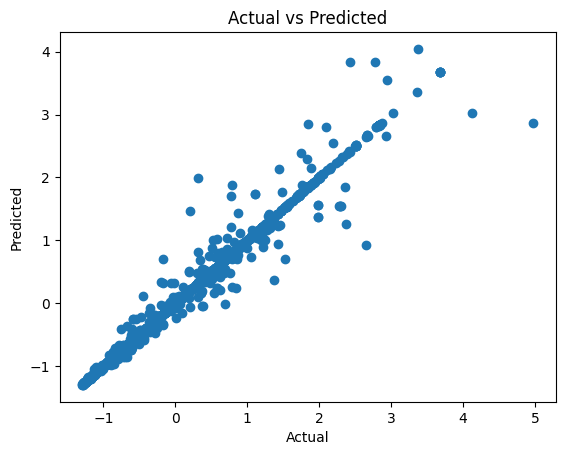

In [0]:
# Graphical representation of the model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()